# Seaborn

Seaborn is a nice library for make easy statistical plots

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Seaborn Data

Seaborn can easily load some classic/toy datasets to illustrate plotting features.  An internet connection is required to load the data.  

In [2]:
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights') # not the same dataset we used in HW

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot

``sns.distplot(variable, bins= , hist=(boolean), kde=(boolean))``  
``sns.rugplot(variable)``

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

`sns.jointplot(x='',y='',data=,kind='')`

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

``sns.pairplot(data)``  
``sns.pairplot(data, hue= , palette="")``

## boxplot and violinplot

#### boxplot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

``sns.boxplot(x="", y="", data= ,palette="")`` 

``sns.boxplot(data= ,palette=' ',orient=' ')``

``sns.boxplot(x=" ", y=" ", hue=" ",data= , palette=" ")``

#### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

`sns.violinplot(x="<cat>", y="<num>", data= , palette=' ')`

`sns.violinplot(x="<cat>", y="<num>", data= , hue=' ', palette=' ')`

`sns.violinplot(x="<cat>", y="<num>", data= , hue=' ', split=(boolean), palette=' ')`

## stripplot 
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.


``sns.stripplot(x="<cat>", y="<num>", data= , jitter=<bool>)``

``sns.stripplot(x="<cat>", y="<num>", data= ,jitter=<bool>,hue='<cat>',palette=' ',split=<bool>)``

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! 

* barplot
* countplot

``sns.barplot(x='<cat>',y='<num>',data= , estimator= <default is mean>)``

``sns.countplot(x='<cat>',data=tips)``

# Plots for "Matrix" Data

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

`sns.heatmap(matrix)`

`sns.heatmap(matrix, cmap=' ', annot=<bool>)`

`sns.clustermap(matrix)`

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

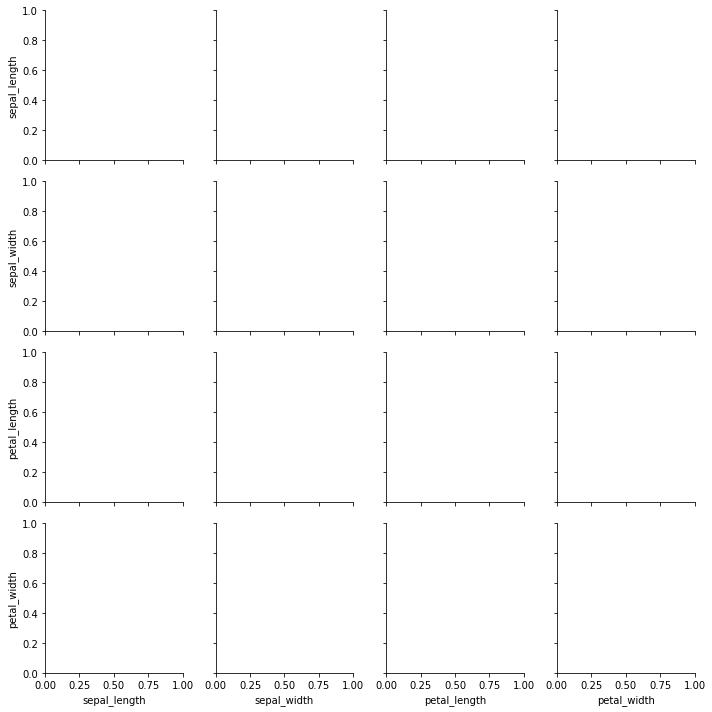

In [3]:
# Just the Grid
sns.PairGrid(iris)

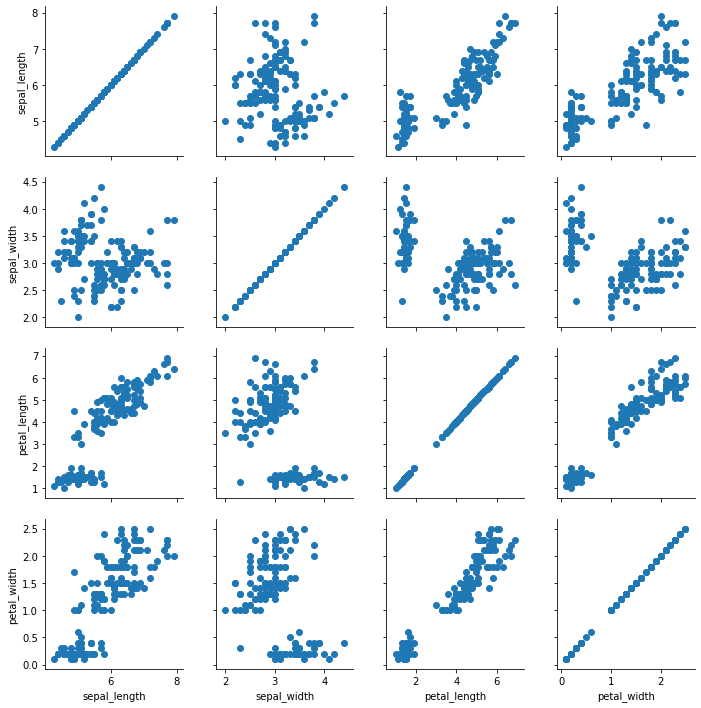

In [4]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

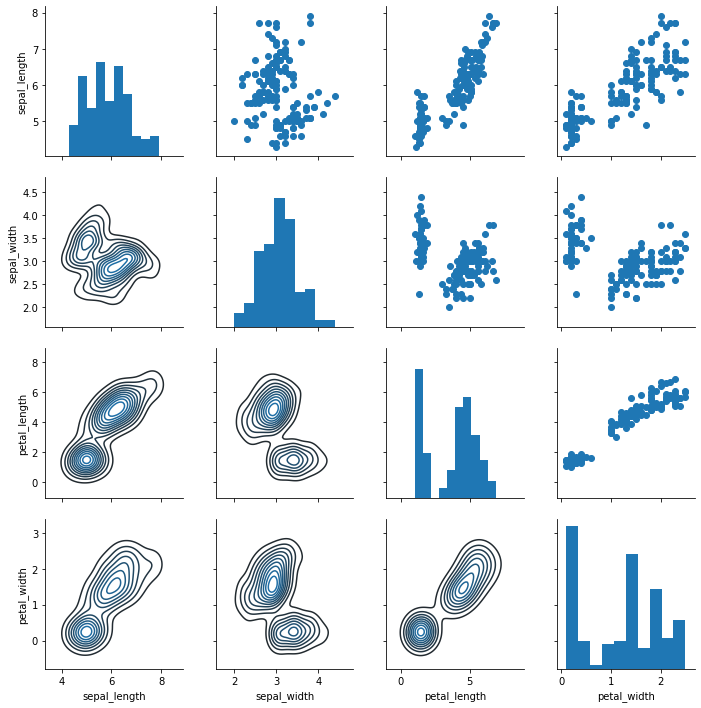

In [5]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid 

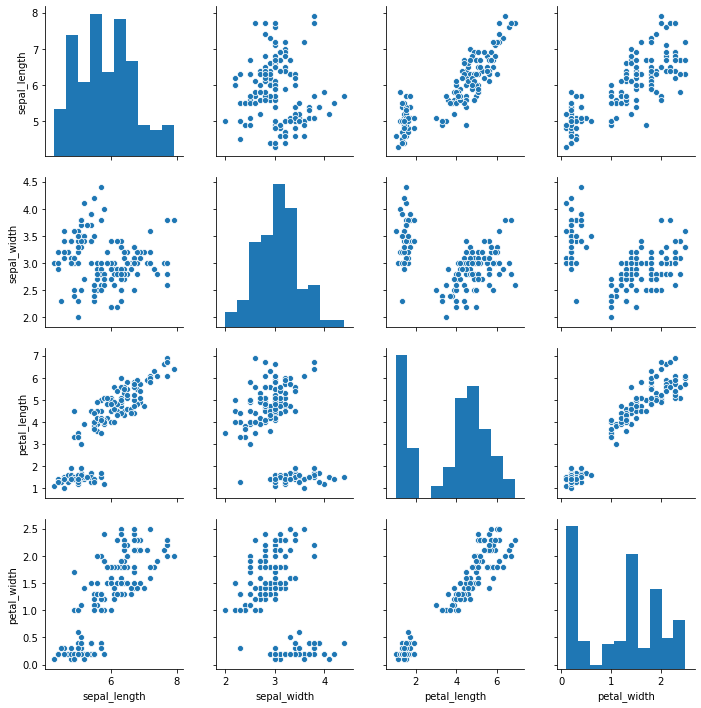

In [6]:
sns.pairplot(iris)

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature

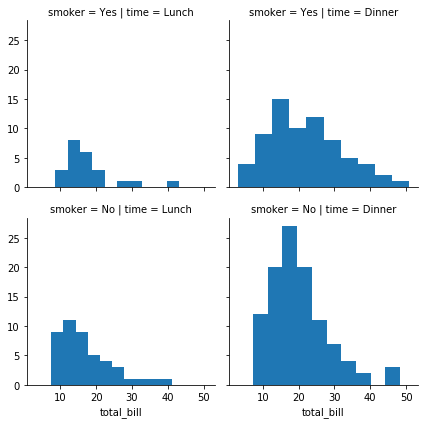

In [7]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

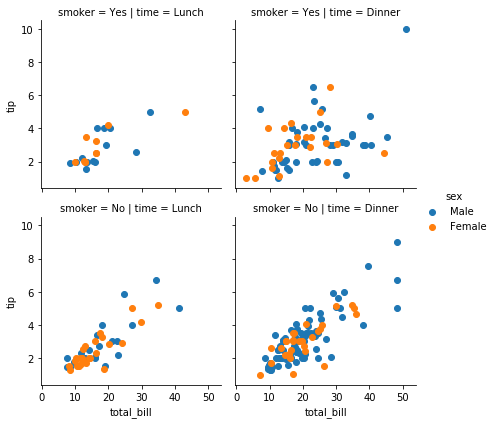

In [8]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Regression Plots

Seaborn has many built-in capabilities for regression plots.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

`sns.lmplot(x='<num>',y='<num>', data= )`

`sns.lmplot(x='<num>',y='<nujm>',data= , hue='<cat>', palette=" ")`



## Using a Grid

`lmplot` can easily create facets. Z Just indicate this with the col or row arguments:

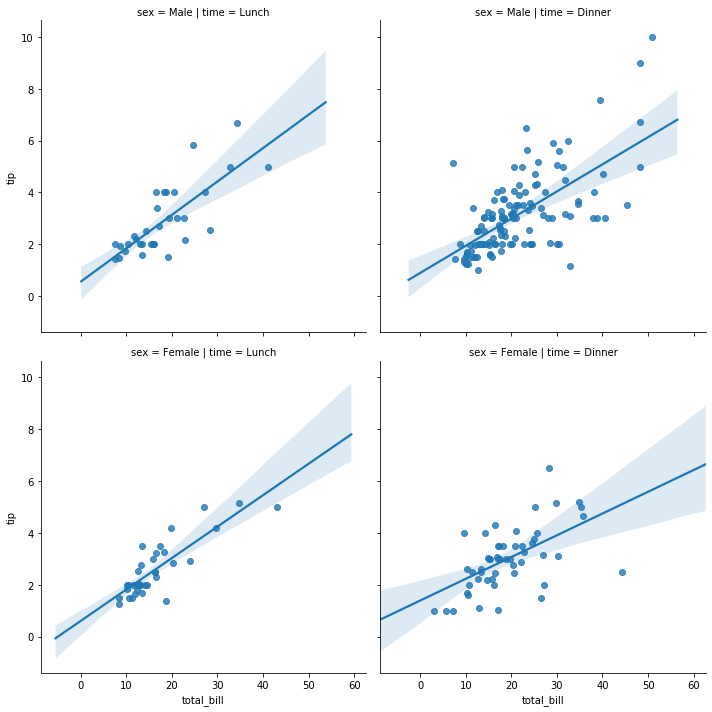

In [16]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

# Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** (inches) and **aspect** (ratio) parameters.  

sns.lmplot(x=' ',y=' ',data= ,col=' ',hue=' ',palette=' ', aspect= ,size= )

There is also a **height** parameter that specifies the height of individual facets.

# Style and Context

`sns.set_style('whitegride')` can take the following styles:  darkgrid, whitegrid, dark, white, or ticks.  Advanced users can customize further.

`sns.set_context('notebook', font_scale = 1)` can take take the following contexts: notebook (default), paper, talk, poster.  The font can also be adjusted.  Advanced users can customize further.

In [2]:
sns.set_style('whitegrid')